In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import math
import io

In [6]:
df = pd.read_csv("criminal_train.csv")
print(df)

       IFATHER  NRCH17_2  IRHHSIZ2  ...  VESTR  VEREP  Criminal
0            4         1         2  ...  40035      2         0
1            4         0         1  ...  40003      1         0
2            4         2         3  ...  40038      1         0
3            4         0         4  ...  40020      2         0
4            1         0         4  ...  40007      1         0
...        ...       ...       ...  ...    ...    ...       ...
45713        4         2         4  ...  40031      2         0
45714        4         0         4  ...  40045      2         0
45715        1         0         3  ...  40023      2         0
45716        4         0         4  ...  40015      2         0
45717        4         1         3  ...  40034      2         0

[45718 rows x 71 columns]


In [11]:
z=np.zeros((45718,71))
z[:]=df[:]
train=df.iloc[5000:,:].values
test=df.iloc[:5000,:].values
dtrain=np.zeros((40718,71))
dtrain[:]=train[:]
print(dtrain)
dtest=np.zeros((5000,71))
dtest[:]=test[:]
print(dtest)

[[2.0000e+00 0.0000e+00 3.0000e+00 ... 4.0038e+04 2.0000e+00 0.0000e+00]
 [4.0000e+00 2.0000e+00 4.0000e+00 ... 4.0015e+04 1.0000e+00 0.0000e+00]
 [4.0000e+00 0.0000e+00 2.0000e+00 ... 4.0030e+04 2.0000e+00 0.0000e+00]
 ...
 [1.0000e+00 0.0000e+00 3.0000e+00 ... 4.0023e+04 2.0000e+00 0.0000e+00]
 [4.0000e+00 0.0000e+00 4.0000e+00 ... 4.0015e+04 2.0000e+00 0.0000e+00]
 [4.0000e+00 1.0000e+00 3.0000e+00 ... 4.0034e+04 2.0000e+00 0.0000e+00]]
[[4.0000e+00 1.0000e+00 2.0000e+00 ... 4.0035e+04 2.0000e+00 0.0000e+00]
 [4.0000e+00 0.0000e+00 1.0000e+00 ... 4.0003e+04 1.0000e+00 0.0000e+00]
 [4.0000e+00 2.0000e+00 3.0000e+00 ... 4.0038e+04 1.0000e+00 0.0000e+00]
 ...
 [4.0000e+00 0.0000e+00 2.0000e+00 ... 4.0022e+04 2.0000e+00 0.0000e+00]
 [4.0000e+00 0.0000e+00 2.0000e+00 ... 4.0017e+04 1.0000e+00 0.0000e+00]
 [2.0000e+00 0.0000e+00 3.0000e+00 ... 4.0010e+04 1.0000e+00 0.0000e+00]]


In [12]:
print(dtrain.shape)
print(dtest.shape)

(40718, 71)
(5000, 71)


In [13]:
y_train=np.zeros((40718,1))
y_train[:]=dtrain[:,[70]]
y_test=np.zeros((5000,1))
y_test[:]=dtest[:,[70]]
print(y_test)
print(y_train)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [14]:
x_train=np.zeros((5000,70))
x_test=np.zeros((40718,70))
x_test= np.delete(dtest,70,axis=1)
x_train=np.delete(dtrain,70,axis=1)

In [16]:
print(x_train)
print(x_train.shape)
print(x_test)
print(x_test.shape)

[[2.00000000e+00 0.00000000e+00 3.00000000e+00 ... 2.32875785e+02
  4.00380000e+04 2.00000000e+00]
 [4.00000000e+00 2.00000000e+00 4.00000000e+00 ... 7.35768196e+03
  4.00150000e+04 1.00000000e+00]
 [4.00000000e+00 0.00000000e+00 2.00000000e+00 ... 5.32077248e+03
  4.00300000e+04 2.00000000e+00]
 ...
 [1.00000000e+00 0.00000000e+00 3.00000000e+00 ... 5.12671234e+02
  4.00230000e+04 2.00000000e+00]
 [4.00000000e+00 0.00000000e+00 4.00000000e+00 ... 4.62459704e+02
  4.00150000e+04 2.00000000e+00]
 [4.00000000e+00 1.00000000e+00 3.00000000e+00 ... 1.52381087e+03
  4.00340000e+04 2.00000000e+00]]
(40718, 70)
[[4.00000000e+00 1.00000000e+00 2.00000000e+00 ... 2.50987666e+03
  4.00350000e+04 2.00000000e+00]
 [4.00000000e+00 0.00000000e+00 1.00000000e+00 ... 3.85796934e+03
  4.00030000e+04 1.00000000e+00]
 [4.00000000e+00 2.00000000e+00 3.00000000e+00 ... 2.04709758e+03
  4.00380000e+04 1.00000000e+00]
 ...
 [4.00000000e+00 0.00000000e+00 2.00000000e+00 ... 1.12758566e+04
  4.00220000e+04 2.0

In [19]:
x_trainf = np.zeros((70,40718))
x_testf = np.zeros((70,5000))
y_trainf = np.zeros((1,40718))
y_testf = np.zeros((1,5000))

x_trainf = np.transpose(x_train)
x_testf = np.transpose(x_test)
y_trainf = np.transpose(y_train)
y_testf= np.transpose(y_test)

In [20]:
print(x_trainf[:][:])

[[2.00000000e+00 4.00000000e+00 4.00000000e+00 ... 1.00000000e+00
  4.00000000e+00 4.00000000e+00]
 [0.00000000e+00 2.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [3.00000000e+00 4.00000000e+00 2.00000000e+00 ... 3.00000000e+00
  4.00000000e+00 3.00000000e+00]
 ...
 [2.32875785e+02 7.35768196e+03 5.32077248e+03 ... 5.12671234e+02
  4.62459704e+02 1.52381087e+03]
 [4.00380000e+04 4.00150000e+04 4.00300000e+04 ... 4.00230000e+04
  4.00150000e+04 4.00340000e+04]
 [2.00000000e+00 1.00000000e+00 2.00000000e+00 ... 2.00000000e+00
  2.00000000e+00 2.00000000e+00]]


In [22]:
mtrain=x_trainf.shape[1]
print(mtrain)
utrain=np.sum(x_trainf,axis=1,keepdims=True)/mtrain
print(utrain)

40718
[[3.35338180e+00]
 [4.73353308e-01]
 [3.42521735e+00]
 [1.00162090e+00]
 [2.08310821e+00]
 [1.00702392e+00]
 [1.16329387e+00]
 [1.01085515e+00]
 [9.73414706e+01]
 [7.07639373e+01]
 [2.35362739e+00]
 [2.61442114e+00]
 [2.20086939e+00]
 [2.02485387e+00]
 [3.95336215e+01]
 [8.61279041e+01]
 [1.28036741e+01]
 [9.23097893e+01]
 [8.93534555e+01]
 [9.13251633e+01]
 [9.71275112e+01]
 [9.71609116e+01]
 [9.71723316e+01]
 [9.71551402e+01]
 [9.71607888e+01]
 [1.77174714e+00]
 [1.01827202e+00]
 [1.91649885e+00]
 [1.00933248e+00]
 [1.96124564e+00]
 [1.00505919e+00]
 [1.38744536e+00]
 [1.01360578e+00]
 [8.58300260e+01]
 [7.88702785e+00]
 [9.79784616e+01]
 [9.79784616e+01]
 [1.94623999e+00]
 [1.10351687e+00]
 [1.01792819e+00]
 [1.85473255e+00]
 [1.73004568e+00]
 [1.13878383e+00]
 [1.83781129e+00]
 [1.01900879e+00]
 [1.93113611e+00]
 [1.01891056e+00]
 [1.80045680e+00]
 [1.00992190e+00]
 [1.97291124e+00]
 [1.01468638e+00]
 [1.96350508e+00]
 [1.01119898e+00]
 [9.40897146e+01]
 [8.52168574e+00]
 [2.

In [23]:
trainx=x_trainf-utrain
testx=x_testf-utrain
n=(np.sum(np.square(trainx),axis=1,keepdims=True))/mtrain
trainx=trainx/n
testx=testx/n

In [25]:
print(trainx.shape)
print(testx.shape)
print(trainx)
print(testx)

(70, 40718)
(70, 5000)
[[-9.74341659e-01  4.65520561e-01  4.65520561e-01 ... -1.69427277e+00
   4.65520561e-01  4.65520561e-01]
 [-6.03470629e-01  1.94629767e+00 -6.03470629e-01 ... -6.03470629e-01
  -6.03470629e-01  6.71413519e-01]
 [-2.08341890e-01  2.81623749e-01 -6.98307529e-01 ... -2.08341890e-01
   2.81623749e-01 -2.08341890e-01]
 ...
 [-1.36803566e-04  8.21169711e-05  1.95298207e-05 ... -1.28206424e-04
  -1.29749250e-04 -9.71376163e-05]
 [ 1.83434521e-04 -1.08059843e-04  8.20451771e-05 ... -6.67049903e-06
  -1.08059843e-04  1.32739849e-04]
 [ 2.01866538e+00 -1.97705757e+00  2.01866538e+00 ...  2.01866538e+00
   2.01866538e+00  2.01866538e+00]]
[[ 4.65520561e-01  4.65520561e-01  4.65520561e-01 ...  4.65520561e-01
   4.65520561e-01 -9.74341659e-01]
 [ 6.71413519e-01 -6.03470629e-01  1.94629767e+00 ... -6.03470629e-01
  -6.03470629e-01 -6.03470629e-01]
 [-6.98307529e-01 -1.18827317e+00 -2.08341890e-01 ... -6.98307529e-01
  -6.98307529e-01 -2.08341890e-01]
 ...
 [-6.68392408e-05 -2.

In [26]:
def sigmoid(z):
  s=1/ ( 1 + np.exp(-z))
  return s

In [27]:
def sigmoidderivative(z):
  s=f*(1-f)
  return s

In [28]:
def tanh(z):
  s=(np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
  return s

In [29]:
def tanhderivative(z):
  s=1-np.square(z)
  return s

In [30]:
def relu(z):
  s=np.maximum(0,z)
  return s

In [31]:
def reluderivative(z):
  z[z<=0] = 0
  z[z>0] = 1
  return z

In [32]:
def initialize(l1):
    
    l = len(l1)
    param = {}
    np.random.seed(0)
    for i in range(1,l-1):
      param["W"+str(i)]=np.random.randn(l1[i],l1[i-1]) * np.sqrt(2/l1[i-1]) 
      param["b"+str(i)]=np.zeros((l1[i],1))
    
    param["W"+str(l-1)]=np.random.randn(l1[l-1],l1[l-2]) * 0.001
    param["b"+str(l-1)]=np.zeros((l1[l-1],1)) 
   
    
    return param

In [33]:
def initialize_adam(param,layer) :
    
    L = len(param) // 2
    v = {}
    s = {}
    
   
    for l in range(L-1):
   
        v["dW" + str(l+1)] = np.zeros(param['W' + str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(param['b' + str(l+1)].shape)
        s["dW" + str(l+1)] = np.zeros(param['W' + str(l+1)].shape)
        s["db" + str(l+1)] = np.zeros(param['b' + str(l+1)].shape)
    
    
    return v, s

In [34]:
def random_mini_batches(X, Y, mini_batch_size = 512):
    
               
    m = X.shape[1]                  
    mini_batches = []   
    p = list(np.random.p(m))
    newx = X[:, p]
    newy = Y[:, p].reshape((1,m))
    num_complete_minibatches = math.floor(m/mini_batch_size) 
    for k in range(0, num_complete_minibatches):
        mx = newx[:, k*mini_batch_size : (k+1)*mini_batch_size]
        mini_batch_Y = newy[:, k*mini_batch_size : (k+1)*mini_batch_size]
      
        mini_batch = (mx, my)
        mini_batches.append(mini_batch)
    
    if m % mini_batch_size != 0:
        
        mx = newx[:, num_complete_minibatches*mini_batch_size:]
        my = newy[:, num_complete_minibatches*mini_batch_size:]
        
        mini_batch = (mx, my)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [35]:

def fwd_propagation(X,param,l1):
  
  l = len(l1)
  f = {}
  
  f["Z"+str(1)]=np.dot(param["W"+str(1)],X)+param["b"+str(1)]
    
  f["A"+str(1)]=relu(f["Z"+str(1)])
  
  for i in range(2,l-1):
    f["Z"+str(i)]=np.dot(param["W"+str(i)],f["A"+str(i-1)])+param["b"+str(i)]
    f["A"+str(i)]=relu(f["Z"+str(i)])
   
  f["Z"+str(l-1)]=np.dot(param["W"+str(l-1)],f["A"+str(l-2)])+param["b"+str(l-1)]
  f["A"+str(l-1)]=sigmoid(f["Z"+str(l-1)])
  
  return f

In [36]:
def fwd_propagation_drop(X,parameters,layer,keep_prob):
  drop = {}
  l = len(layer)
  forward = {}
  
  forward["Z"+str(1)]=np.dot(parameters["W"+str(1)],X)+parameters["b"+str(1)]
    
  forward["A"+str(1)]=relu(forward["Z"+str(1)])
  drop["d"+str(1)]=(np.random.rand(forward["A"+str(1)].shape[0],forward["A"+str(1)].shape[1])) < keep_prob[1]
    
  forward["A"+str(1)] = np.multiply(forward["A"+str(1)],drop["d"+str(1)])
  forward["A"+str(1)] = forward["A"+str(1)] / keep_prob[1]
  
  for i in range(2,l-1):
    forward["Z"+str(i)]=np.dot(parameters["W"+str(i)],forward["A"+str(i-1)])+parameters["b"+str(i)]
    
    forward["A"+str(i)]=relu(forward["Z"+str(i)])
    drop["d"+str(i)]=(np.random.rand(forward["A"+str(i)].shape[0],forward["A"+str(i)].shape[1])) < keep_prob[i]
    
    forward["A"+str(i)] = np.multiply(forward["A"+str(i)],drop["d"+str(i)])
    forward["A"+str(i)] = forward["A"+str(i)] / keep_prob[i]
    
  forward["Z"+str(l-1)]=np.dot(parameters["W"+str(l-1)],forward["A"+str(l-2)])+parameters["b"+str(l-1)]
  forward["A"+str(l-1)]=sigmoid(forward["Z"+str(l-1)])
  
  return forward

In [37]:
def back_prop(X,Y,forward,layer,parameters,lambd=0.6):
  m = X.shape[1]
  l = len(layer)
  grads = {}
  
  grads["dz"+str(l-1)]= forward["A"+str(l-1)] - Y
  grads["dw"+str(l-1)]=(np.dot(grads["dz"+str(l-1)],forward["A"+str(l-2)].T) / m) + ((lambd/m)*parameters["W"+str(l-1)])
  grads["db"+str(l-1)]=np.sum(grads["dz"+str(l-1)],axis=1,keepdims=True) / m 
  grads["da"+str(l-2)]=np.dot(parameters["W"+str(l-1)].T,grads["dz"+str(l-1)])
  
  for i in range(l-2,1,-1):
    grads["dz"+str(i)]=grads["da"+str(i)]*reluderivative(forward["A"+str(i)])
    grads["dw"+str(i)]=(np.dot(grads["dz"+str(i)],forward["A"+str(i-1)].T) / m) + ((lambd/m)*parameters["W"+str(i)])
    grads["db"+str(i)]=np.sum(grads["dz"+str(i)],axis=1,keepdims=True)/m
    grads["da"+str(i-1)]=np.dot(parameters["W"+str(i)].T,grads["dz"+str(i)])
  
  grads["dz"+str(1)]=grads["da"+str(1)]*reluderivative(forward["A"+str(1)])
  grads["dw"+str(1)]=np.dot(grads["dz"+str(1)],X.T)/m + ((lambd/m)*parameters["W"+str(1)])

  grads["db"+str(1)]=np.sum(grads["dz"+str(1)],axis=1,keepdims=True)/m
    
  return grads

In [38]:
def optimise(parameters,grads,layer,learning_rate=0.01):
  l= len(layer)
  
  for i in range(1,l):
    parameters["W"+str(i)]=parameters["W"+str(i)] - (learning_rate * grads["dw"+str(i)])
    parameters["b"+str(i)]=parameters["b"+str(i)] - (learning_rate * grads["db"+str(i)])
  
  return parameters

In [39]:
def update_parameters_with_adam(parameters, grads, layer, v, s, t, learning_rate = 0.01, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    
    
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    
    for l in range(L-1):
       
        v["dW" + str(l+1)] = beta1 * v['dW' + str(l+1)] + (1-beta1) * grads['dw' + str(l+1)]
        v["db" + str(l+1)] = beta1 * v['db' + str(l+1)] + (1-beta1) * grads['db' + str(l+1)]
       
        v_corrected["dw" + str(l+1)] = v['dW' + str(l+1)] / (1 - np.power(beta1, t))
        v_corrected["db" + str(l+1)] = v['db' + str(l+1)] / (1 - np.power(beta1, t))
       

        s["dW" + str(l+1)] = beta2 * s['dW' + str(l+1)] + (1-beta2) * np.power(grads['dw' + str(l+1)], 2)
        s["db" + str(l+1)] = beta2 * s['db' + str(l+1)] + (1-beta2) * np.power(grads['db' + str(l+1)], 2)
        
        s_corrected["dw" + str(l+1)] = s['dW' + str(l+1)] / (1 - np.power(beta2, t))
        s_corrected["db" + str(l+1)] = s['db' + str(l+1)] / (1 - np.power(beta2, t))
       
        parameters["W" + str(l+1)] = parameters['W' + str(l+1)] - learning_rate * v_corrected['dw' + str(l+1)] / np.sqrt(s_corrected['dw' + str(l+1)] + epsilon)
        parameters["b" + str(l+1)] = parameters['b' + str(l+1)] - learning_rate * v_corrected['db' + str(l+1)] / np.sqrt(s_corrected['db' + str(l+1)] + epsilon)
       
    return parameters, v, s

In [40]:
def predict(X,parameters,layers):
  l= len(layer)
  fwd = fwd_propagation(X,parameters,layers)
  
  Y1 = fwd["A"+str(l-1)]
  Y1 = np.around(Y1)
  
  return Y1

In [41]:
def calculate_cost(Y,forward,parameters,layer,lambd=0.6):
  l= len(layer)
  m=Y.shape[1]
  
  cost = (-1 * np.sum((Y * np.log(forward["A"+str(l-1)])) + (1 - Y) * np.log(1 - forward["A"+str(l-1)])) / m) + ((lambd/(2*m))*np.sum(np.square(parameters["W"+str(l-1)])))
  
  return cost

In [42]:
def model(X_train,Y_train, X_test, Y_test, layer, keep_prob,mini_batch_size=512, beta1=0.0, beta2=0.0, learning_rate=0.001, iterations = 1500, lambd=0.6):
  costs = []
  
  parameters = initialize(layer)
  v, s = initialize_adam(parameters,layer)
  t = 0
  
  for j in range(iterations):
  
    minibatches = random_mini_batches(X_train,Y_train,mini_batch_size)
    
    for minibatch in minibatches:
      (minibatch_x,minibatch_y) = minibatch
      
      forward = fwd_propagation_drop(minibatch_x,parameters,layer,keep_prob)
      
      cost = calculate_cost(minibatch_y,forward,parameters,layer,lambd)
      grads = back_prop(minibatch_x,minibatch_y,forward,layer,parameters,lambd)
      t=t+1
      parameters,v,s = update_parameters_with_adam(parameters, grads, layer, v, s, t, learning_rate,beta1, beta2)
    
    
    if j % 10 == 0:
      costs.append(cost)
    
    if j%50 == 0:
      print ("Cost after iteration %i: %f" %(j , cost))
    #if j == 100:
      #par = parameters[:]
      
  Y_prediction_train = predict(X_train,parameters,layer)
  Y_prediction_test = predict(X_test,parameters,layer)

  abb = np.mean(np.abs(Y_prediction_train - Y_train)) * 100
  abc = np.mean(np.abs(Y_prediction_test - Y_test)) * 100
  print("train accuracy: {} %".format(100 - abb))
  print("test accuracy: {} %".format(100 - abc))
  
  return parameters, grads, forward, costs, Y_prediction_test, Y_prediction_train

In [43]:
layer = [70,15,12,6,1]
keep_prob = [1.0,1.0,1.0,1.0,1.0]
para,grd,ford,cst,test,train1 = model(trainx, y_trainf, testx, y_testf, layer, keep_prob, mini_batch_size=128, beta1=0.9, beta2=0.999, learning_rate = 0.001, iterations = 620, lambd = 0.0 )

Cost after iteration 0: 0.541315


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


Cost after iteration 50: 0.038811
Cost after iteration 100: 0.005443
Cost after iteration 150: 0.136275
Cost after iteration 200: 0.268307
Cost after iteration 250: 0.306973
Cost after iteration 300: 0.349003
Cost after iteration 350: 0.113325
Cost after iteration 400: 0.366701
Cost after iteration 450: 0.032505
Cost after iteration 500: 0.120940
Cost after iteration 550: 0.086108
Cost after iteration 600: 0.103366
train accuracy: 95.73898521538386 %
test accuracy: 95.16 %


In [44]:
a = np.zeros((1,5000))
a1 = np.zeros((1,5000))
a2 = np.zeros((1,5000))
a3 = np.zeros((1,5000))
a = test - y_testf
a1 = np.copy(a)
a2 = np.copy(a)
a1[a1==-1]=0
a[a==1]=0
fp = np.sum(a1)
fn = np.sum(a)
fn = -1 * fn
a2[a2==-1]=1
corr = 5000-np.sum(a2)

exam3 = test * y_testf

tp = np.sum(a3)
tn = corr-tp
print("fp="+ str(fp))
print("fn="+ str(fn))
print("correct="+ str(corr))
print("tp="+ str(tp))
print("tn="+ str(tn))

fp=115.0
fn=127.0
correct=4758.0
tp=217.0
tn=4541.0


In [45]:
n = tn+tp+fn+fp
s = (tp+fn)/n
p = (tp+fp)/n

mcc = ((tp/n) - (s*p))/np.sqrt(p*s*(1-s)*(1-p))
mcc1 = ((tp*tn)-(fp*fn))/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print("MCC score="+ str(mcc1))

MCC score=0.6161777558526986


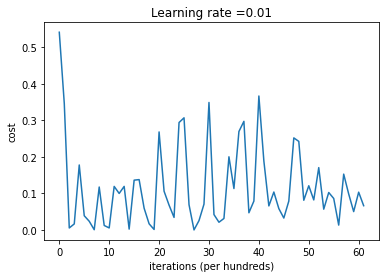

In [46]:
costs = np.squeeze(cst)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(0.01))
plt.show()

In [47]:
test = pd.read_csv("criminal_test.csv")
print(test)

       IFATHER  NRCH17_2  IRHHSIZ2  ...     ANALWT_C  VESTR  VEREP
0            4         0         3  ...  1448.823373  40039      2
1            1         0         6  ...   444.628255  40037      2
2            4         0         1  ...  2109.523374  40030      1
3            4         0         4  ...  1861.925999  40003      2
4            4         0         2  ...  5712.632091  40016      1
...        ...       ...       ...  ...          ...    ...    ...
11425        4         3         6  ...  2827.445484  40011      2
11426        4         0         4  ...  5194.522223  40020      2
11427        4         2         4  ...  2864.879952  40020      1
11428        4         2         4  ...   502.923133  40017      1
11429        2         0         5  ...   224.402498  40007      2

[11430 rows x 70 columns]


In [48]:
testf = np.zeros((11430,70))
testf[:] = test[:]

In [50]:
testnew = np.zeros((70,11430))
testnew = np.transpose(testf)
testnew = testnew - utrain
testnew = testnew / n
print(testnew)
print(str(testnew.shape))

[[ 1.29323641e-04 -4.70676359e-04  1.29323641e-04 ...  1.29323641e-04
   1.29323641e-04 -2.70676359e-04]
 [-9.46706616e-05 -9.46706616e-05 -9.46706616e-05 ...  3.05329338e-04
   3.05329338e-04 -9.46706616e-05]
 [-8.50434697e-05  5.14956530e-04 -4.85043470e-04 ...  1.14956530e-04
   1.14956530e-04  3.14956530e-04]
 ...
 [-6.47269554e-01 -8.48108577e-01 -5.15129554e-01 ... -3.64058238e-01
  -8.36449602e-01 -8.92153729e-01]
 [ 3.09473452e-03  2.69473452e-03  1.29473452e-03 ... -7.05265485e-04
  -1.30526548e-03 -3.30526548e-03]
 [ 1.01041309e-04  1.01041309e-04 -9.89586915e-05 ... -9.89586915e-05
  -9.89586915e-05  1.01041309e-04]]
(70, 11430)


In [51]:
output=predict(testnew,para,layer)

In [52]:
output.shape

(1, 11430)

In [53]:
output

array([[0., 0., 0., ..., 0., 0., 0.]])

In [55]:
from google.colab import files
with open('output.csv', 'w') as f:
  np.savetxt('output.csv',test.T,fmt='%.1f',delimiter=',',newline='\n')
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>